## Flight Delay Analysis

.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

pd.set_option("display.max_columns", None)

In [3]:
# getting the data to the development environment from kaggle 

import kagglehub

# Download latest version
path = kagglehub.dataset_download("patrickzel/flight-delay-and-cancellation-dataset-2019-2023")

print("Path to dataset files:", path)

Path to dataset files: /teamspace/studios/this_studio/.cache/kagglehub/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023/versions/7


In [4]:
flight_df = pd.read_csv("/teamspace/studios/this_studio/.cache/kagglehub/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023/versions/7/flights_sample_3m.csv")
flight_df.head(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
5,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",1010,1237.0,147.0,15.0,1252.0,1328.0,3.0,1110,1331.0,141.0,0.0,NaN,0.0,60.0,54.0,36.0,181.0,141.0,0.0,0.0,0.0,0.0
6,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",1010,1001.0,-9.0,23.0,1024.0,1122.0,8.0,1159,1130.0,-29.0,0.0,NaN,0.0,109.0,89.0,58.0,399.0,NaN,NaN,NaN,NaN,NaN
7,2019-07-08,Republic Airline,Republic Airline: YX,YX,20452,4464,HSV,"Huntsville, AL",DCA,"Washington, DC",1643,1637.0,-6.0,22.0,1659.0,1927.0,41.0,1945,2008.0,23.0,0.0,NaN,0.0,122.0,151.0,88.0,613.0,0.0,0.0,23.0,0.0,0.0
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",530,527.0,-3.0,11.0,538.0,658.0,8.0,717,706.0,-11.0,0.0,NaN,0.0,227.0,219.0,200.0,1379.0,NaN,NaN,NaN,NaN,NaN
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",2125,2116.0,-9.0,19.0,2135.0,2353.0,3.0,2355,2356.0,1.0,0.0,NaN,0.0,210.0,220.0,198.0,1533.0,NaN,NaN,NaN,NaN,NaN


In [5]:
flight_df.sample(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
2050626,2021-08-25,Hawaiian Airlines Inc.,Hawaiian Airlines Inc.: HA,HA,19690,187,KOA,"Kona, HI",HNL,"Honolulu, HI",945,940.0,-5.0,6.0,946.0,1015.0,5.0,1033,1020.0,-13.0,0.0,NaN,0.0,48.0,40.0,29.0,163.0,NaN,NaN,NaN,NaN,NaN
2866382,2022-10-12,Endeavor Air Inc.,Endeavor Air Inc.: 9E,9E,20363,5461,BNA,"Nashville, TN",LGA,"New York, NY",1335,1329.0,-6.0,24.0,1353.0,1641.0,8.0,1656,1649.0,-7.0,0.0,NaN,0.0,141.0,140.0,108.0,764.0,NaN,NaN,NaN,NaN,NaN
1256045,2020-02-09,Mesa Airlines Inc.,Mesa Airlines Inc.: YV,YV,20378,6130,IAD,"Washington, DC",DTW,"Detroit, MI",845,838.0,-7.0,15.0,853.0,1001.0,5.0,1025,1006.0,-19.0,0.0,NaN,0.0,100.0,88.0,68.0,383.0,NaN,NaN,NaN,NaN,NaN
237124,2022-09-20,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1897,LAS,"Las Vegas, NV",MDW,"Chicago, IL",1805,1804.0,-1.0,10.0,1814.0,2307.0,15.0,2330,2322.0,-8.0,0.0,NaN,0.0,205.0,198.0,173.0,1521.0,NaN,NaN,NaN,NaN,NaN
442361,2022-06-01,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2609,AUS,"Austin, TX",SEA,"Seattle, WA",1600,1555.0,-5.0,27.0,1622.0,1833.0,3.0,1822,1836.0,14.0,0.0,NaN,0.0,262.0,281.0,251.0,1770.0,NaN,NaN,NaN,NaN,NaN
1580483,2023-08-26,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,4873,LAX,"Los Angeles, CA",ABQ,"Albuquerque, NM",1600,1551.0,-9.0,9.0,1600.0,1839.0,8.0,1859,1847.0,-12.0,0.0,NaN,0.0,119.0,116.0,99.0,677.0,NaN,NaN,NaN,NaN,NaN
2702503,2021-06-25,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,697,EWR,"Newark, NJ",BOS,"Boston, MA",855,852.0,-3.0,19.0,911.0,948.0,6.0,1006,954.0,-12.0,0.0,NaN,0.0,71.0,62.0,37.0,200.0,NaN,NaN,NaN,NaN,NaN
2449880,2022-09-02,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2566,DTW,"Detroit, MI",ORD,"Chicago, IL",2120,2126.0,6.0,16.0,2142.0,2127.0,9.0,2142,2136.0,-6.0,0.0,NaN,0.0,82.0,70.0,45.0,235.0,NaN,NaN,NaN,NaN,NaN
2758342,2019-06-18,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1683,AUS,"Austin, TX",PHL,"Philadelphia, PA",1220,1216.0,-4.0,13.0,1229.0,1643.0,3.0,1700,1646.0,-14.0,0.0,NaN,0.0,220.0,210.0,194.0,1430.0,NaN,NaN,NaN,NaN,NaN
1213765,2019-07-02,Frontier Airlines Inc.,Frontier Airlines Inc.: F9,F9,20436,1914,AUS,"Austin, TX",TPA,"Tampa, FL",733,740.0,7.0,10.0,750.0,1048.0,8.0,1103,1056.0,-7.0,0.0,NaN,0.0,150.0,136.0,118.0,928.0,NaN,NaN,NaN,NaN,NaN


In [6]:
flight_df.tail(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
2999990,2023-07-26,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,4126,DTW,"Detroit, MI",MSN,"Madison, WI",825,824.0,-1.0,32.0,856.0,851.0,5.0,843,856.0,13.0,0.0,NaN,0.0,78.0,92.0,55.0,311.0,NaN,NaN,NaN,NaN,NaN
2999991,2021-12-03,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1146,MSP,"Minneapolis, MN",SNA,"Santa Ana, CA",1825,1833.0,8.0,23.0,1856.0,2015.0,7.0,2030,2022.0,-8.0,0.0,NaN,0.0,245.0,229.0,199.0,1522.0,NaN,NaN,NaN,NaN,NaN
2999992,2019-01-13,JetBlue Airways,JetBlue Airways: B6,B6,20409,1668,CHS,"Charleston, SC",BOS,"Boston, MA",1258,1245.0,-13.0,15.0,1300.0,1438.0,4.0,1510,1442.0,-28.0,0.0,NaN,0.0,132.0,117.0,98.0,818.0,NaN,NaN,NaN,NaN,NaN
2999993,2019-12-23,Allegiant Air,Allegiant Air: G4,G4,20368,1899,SRQ,"Sarasota/Bradenton, FL",IND,"Indianapolis, IN",907,905.0,-2.0,11.0,916.0,1106.0,9.0,1125,1115.0,-10.0,0.0,NaN,0.0,138.0,130.0,110.0,876.0,NaN,NaN,NaN,NaN,NaN
2999994,2020-08-31,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1408,FLL,"Fort Lauderdale, FL",LGA,"New York, NY",700,653.0,-7.0,16.0,709.0,927.0,6.0,944,933.0,-11.0,0.0,NaN,0.0,164.0,160.0,138.0,1076.0,NaN,NaN,NaN,NaN,NaN
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",1742,1740.0,-2.0,10.0,1750.0,1845.0,6.0,1907,1851.0,-16.0,0.0,NaN,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",1300,1254.0,-6.0,10.0,1304.0,1514.0,5.0,1556,1519.0,-37.0,0.0,NaN,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",534,615.0,41.0,16.0,631.0,759.0,6.0,729,805.0,36.0,0.0,NaN,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",1600,1555.0,-5.0,19.0,1614.0,1704.0,8.0,1728,1712.0,-16.0,0.0,NaN,0.0,88.0,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN
2999999,2019-06-15,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,2823,LGB,"Long Beach, CA",SJC,"San Jose, CA",730,727.0,-3.0,9.0,736.0,828.0,2.0,840,830.0,-10.0,0.0,NaN,0.0,70.0,63.0,52.0,324.0,NaN,NaN,NaN,NaN,NaN


In [7]:
flight_df.shape

(3000000, 32)

In [8]:
flight_df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [9]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

### Data Cleaning and Wrangling

#### 1. Checking for completeness

In [10]:
# calculating percentages of missing values
 
def missing_values_percentages(df: pd.DataFrame):
    missing_percent = (df.isna().sum() /len(df)) * 100
    missing_df = pd.DataFrame({'Column': df.columns, "Missing (%)": missing_percent})
    missing_df = missing_df[missing_df["Missing (%)"] > 0].sort_values(by='Missing (%)', ascending=False)
    return missing_df


In [11]:
missing_values_percentages(flight_df)

,Column,Missing (%)
CANCELLATION_CODE,CANCELLATION_CODE,97.362000
DELAY_DUE_WEATHER,DELAY_DUE_WEATHER,82.204567
DELAY_DUE_NAS,DELAY_DUE_NAS,82.204567
DELAY_DUE_SECURITY,DELAY_DUE_SECURITY,82.204567
DELAY_DUE_LATE_AIRCRAFT,DELAY_DUE_LATE_AIRCRAFT,82.204567
DELAY_DUE_CARRIER,DELAY_DUE_CARRIER,82.204567
AIR_TIME,AIR_TIME,2.873267
ELAPSED_TIME,ELAPSED_TIME,2.873267
ARR_DELAY,ARR_DELAY,2.873267
TAXI_IN,TAXI_IN,2.664800


In [12]:
# dealing with missing values 

# Replace missing delay causes with 0 as absence of data implies no delay due to that cause

delay_columns = [
        'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
        'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'
    ]

flight_df[delay_columns] = flight_df[delay_columns].fillna(0)

In [13]:
# Impute CRS_ELAPSED_TIME with median

flight_df['CRS_ELAPSED_TIME'] = flight_df['CRS_ELAPSED_TIME'].fillna(flight_df['CRS_ELAPSED_TIME'].median())

In [14]:
# Impute ELAPSED_TIME and AIR_TIME for non-canceled flights with group median

flight_df['ELAPSED_TIME'] = flight_df.groupby('AIRLINE_CODE')['ELAPSED_TIME'].transform(lambda x: x.fillna(x.median()))
flight_df['AIR_TIME'] = flight_df.groupby('AIRLINE_CODE')['AIR_TIME'].transform(lambda x: x.fillna(x.median()))

In [16]:
# Impute ARR_DELAY for non-canceled flights
flight_df['ARR_DELAY'] = flight_df.groupby('AIRLINE_CODE')['ARR_DELAY'].transform(lambda x: x.fillna(x.median()))

# Impute WHEELS_ON and TAXI_IN
flight_df['WHEELS_ON'] = flight_df['WHEELS_ON'].fillna(flight_df['CRS_ARR_TIME'] - flight_df['TAXI_IN'].median())
flight_df['TAXI_IN'] = flight_df['TAXI_IN'].fillna(flight_df['TAXI_IN'].median())

# Impute ARR_TIME
flight_df['ARR_TIME'] = flight_df['ARR_TIME'].fillna(flight_df['WHEELS_ON'] + flight_df['TAXI_IN'].median())

# Impute TAXI_OUT and WHEELS_OFF
flight_df['TAXI_OUT'] = flight_df.groupby('ORIGIN')['TAXI_OUT'].transform(lambda x: x.fillna(x.median()))
flight_df['WHEELS_OFF'] = flight_df['WHEELS_OFF'].fillna(flight_df['DEP_TIME'] + flight_df['TAXI_OUT'].median())

# Impute DEP_DELAY and DEP_TIME
flight_df['DEP_DELAY'] = flight_df.groupby('AIRLINE_CODE')['DEP_DELAY'].transform(lambda x: x.fillna(x.median()))
flight_df['DEP_TIME'] = flight_df["DEP_TIME"].fillna(flight_df['CRS_DEP_TIME'] + flight_df['DEP_DELAY'])

In [17]:
# Drop CANCELLATION_CODE as our focus is on delay analysis and the column is missing 97% of its values

flight_df = flight_df.drop(columns=['CANCELLATION_CODE'], errors='ignore')

In [18]:
missing_values_percentages(flight_df)

,Column,Missing (%)


In [19]:
flight_df.isna().sum()

FL_DATE                    0
AIRLINE                    0
AIRLINE_DOT                0
AIRLINE_CODE               0
DOT_CODE                   0
FL_NUMBER                  0
ORIGIN                     0
ORIGIN_CITY                0
DEST                       0
DEST_CITY                  0
CRS_DEP_TIME               0
DEP_TIME                   0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                  0
TAXI_IN                    0
CRS_ARR_TIME               0
ARR_TIME                   0
ARR_DELAY                  0
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
dtype: int64

#### 2. Checking for consistency

In [20]:
# checking for duplicated values 
flight_df.duplicated().sum()

0

The Dataset contains no duplicated values

#### 3. Checking for Uniformity

In [21]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 31 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  DIVERTED

In [22]:
# Handling uniformity of data types 
# Convert FL_DATE to datetime
flight_df['FL_DATE'] = pd.to_datetime(flight_df['FL_DATE'], format='%Y-%m-%d')

In [23]:
# Convert object columns to category
categorical_columns = ['AIRLINE', 'AIRLINE_CODE', 'AIRLINE_DOT','ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY']
for col in categorical_columns:
    flight_df[col] = flight_df[col].astype('category')

In [24]:
# Convert time-related columns to four-digit integers (hhmm)
time_columns = ['CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME']
for col in time_columns:
    flight_df[col] = flight_df[col].astype('Int64') 

In [25]:
# Convert binary flags to boolean
flight_df['CANCELLED'] = flight_df['CANCELLED'].astype(bool)
flight_df['DIVERTED'] = flight_df['DIVERTED'].astype(bool)

In [26]:
# Convert all column names to lowercase
flight_df.columns = flight_df.columns.str.lower()

In [27]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 31 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   fl_date                  datetime64[ns]
 1   airline                  category      
 2   airline_dot              category      
 3   airline_code             category      
 4   dot_code                 int64         
 5   fl_number                int64         
 6   origin                   category      
 7   origin_city              category      
 8   dest                     category      
 9   dest_city                category      
 10  crs_dep_time             Int64         
 11  dep_time                 Int64         
 12  dep_delay                float64       
 13  taxi_out                 float64       
 14  wheels_off               Int64         
 15  wheels_on                Int64         
 16  taxi_in                  float64       
 17  crs_arr_time             In

In [28]:
flight_df_cleaned = flight_df
flight_df_cleaned.head(10) 

,fl_date,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151,-4.0,19.0,1210,1443,4.0,1501,1447,-14.0,False,False,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114,-6.0,9.0,2123,2232,38.0,2315,2310,-5.0,False,False,235.0,236.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000,6.0,20.0,1020,1247,5.0,1252,1252,0.0,False,False,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608,-1.0,27.0,1635,1844,9.0,1829,1853,24.0,False,False,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838,-2.0,15.0,1853,2026,14.0,2041,2040,-1.0,False,False,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0
5,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",1010,1237,147.0,15.0,1252,1328,3.0,1110,1331,141.0,False,False,60.0,54.0,36.0,181.0,141.0,0.0,0.0,0.0,0.0
6,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",1010,1001,-9.0,23.0,1024,1122,8.0,1159,1130,-29.0,False,False,109.0,89.0,58.0,399.0,0.0,0.0,0.0,0.0,0.0
7,2019-07-08,Republic Airline,Republic Airline: YX,YX,20452,4464,HSV,"Huntsville, AL",DCA,"Washington, DC",1643,1637,-6.0,22.0,1659,1927,41.0,1945,2008,23.0,False,False,122.0,151.0,88.0,613.0,0.0,0.0,23.0,0.0,0.0
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",530,527,-3.0,11.0,538,658,8.0,717,706,-11.0,False,False,227.0,219.0,200.0,1379.0,0.0,0.0,0.0,0.0,0.0
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",2125,2116,-9.0,19.0,2135,2353,3.0,2355,2356,1.0,False,False,210.0,220.0,198.0,1533.0,0.0,0.0,0.0,0.0,0.0


#### 4. Checking for Validity

In [29]:
flight_df.describe()

,fl_date,dot_code,fl_number,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft
count,3000000,3.000000e+06,3.000000e+06,3000000.0,3000000.0,3.000000e+06,3.000000e+06,3000000.0,3000000.0,3.000000e+06,3000000.0,3000000.0,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06
mean,2021-05-07 18:03:59.616002048,1.997629e+04,2.511536e+03,1327.061984,1330.504598,9.806089e+00,1.658907e+01,1352.930187,1463.662891,7.634241e+00,1490.560665,1467.727691,3.954262e+00,1.422757e+02,1.362084e+02,1.119000e+02,8.093616e+02,4.405987e+00,7.091943e-01,2.342720e+00,2.596900e-02,4.532725e+00
min,2019-01-01 00:00:00,1.939300e+04,1.000000e+00,1.0,1.0,-9.000000e+01,1.000000e+00,1.0,-5.0,1.000000e+00,1.0,1.0,-9.600000e+01,1.000000e+00,1.500000e+01,8.000000e+00,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2019-12-28 00:00:00,1.979000e+04,1.051000e+03,915.0,916.0,-6.000000e+00,1.100000e+01,931.0,1049.0,4.000000e+00,1107.0,1053.0,-1.500000e+01,9.000000e+01,8.500000e+01,6.200000e+01,3.770000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2021-06-28 00:00:00,1.993000e+04,2.152000e+03,1320.0,1323.0,-2.000000e+00,1.400000e+01,1336.0,1502.0,6.000000e+00,1516.0,1506.0,-7.000000e+00,1.250000e+02,1.200000e+02,9.500000e+01,6.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2022-08-02 00:00:00,2.036800e+04,3.797000e+03,1730.0,1739.0,6.000000e+00,1.900000e+01,1753.0,1909.0,9.000000e+00,1919.0,1914.0,6.000000e+00,1.720000e+02,1.660000e+02,1.410000e+02,1.046000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2023-08-31 00:00:00,2.045200e+04,9.562000e+03,2359.0,2400.0,2.966000e+03,1.840000e+02,2400.0,2400.0,2.490000e+02,2400.0,2400.0,2.934000e+03,7.050000e+02,7.390000e+02,6.920000e+02,5.812000e+03,2.934000e+03,1.653000e+03,1.741000e+03,1.185000e+03,2.557000e+03
std,NaN,3.772846e+02,1.747258e+03,485.878854,499.339192,4.864984e+01,9.089883e+00,500.860552,527.438747,6.191446e+00,511.547566,531.920805,5.046670e+01,7.155653e+01,7.082580e+01,6.892730e+01,5.878939e+02,3.172305e+01,1.375707e+01,1.486748e+01,1.512105e+00,2.546245e+01


In [30]:
def check_outliers(df):
    # List to store outlier details for each column
    outlier_data = []

    # Loop through numeric columns
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        # Compute Q1, Q3, and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Compute outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        outlier_percentage = (outlier_count / df.shape[0]) * 100

        # Append details to the list
        outlier_data.append({
            'column': col,
            'outlier_count': outlier_count,
            'outlier_percentage': outlier_percentage,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        })

    # Convert list to DataFrame
    outlier_df = pd.DataFrame(outlier_data)
    return outlier_df

In [31]:
# Apply the function
check_outliers(flight_df)

,column,outlier_count,outlier_percentage,lower_bound,upper_bound
0,dot_code,0,0.000000,18923.0,21235.0
1,fl_number,140,0.004667,-3068.0,7916.0
2,crs_dep_time,0,0.000000,-307.5,2952.5
3,dep_time,0,0.000000,-318.5,2973.5
4,dep_delay,392850,13.095000,-24.0,24.0
5,taxi_out,166368,5.545600,-1.0,31.0
6,wheels_off,0,0.000000,-302.0,2986.0
7,wheels_on,0,0.000000,-241.0,3199.0
8,taxi_in,179309,5.976967,-3.5,16.5
9,crs_arr_time,0,0.000000,-111.0,3137.0


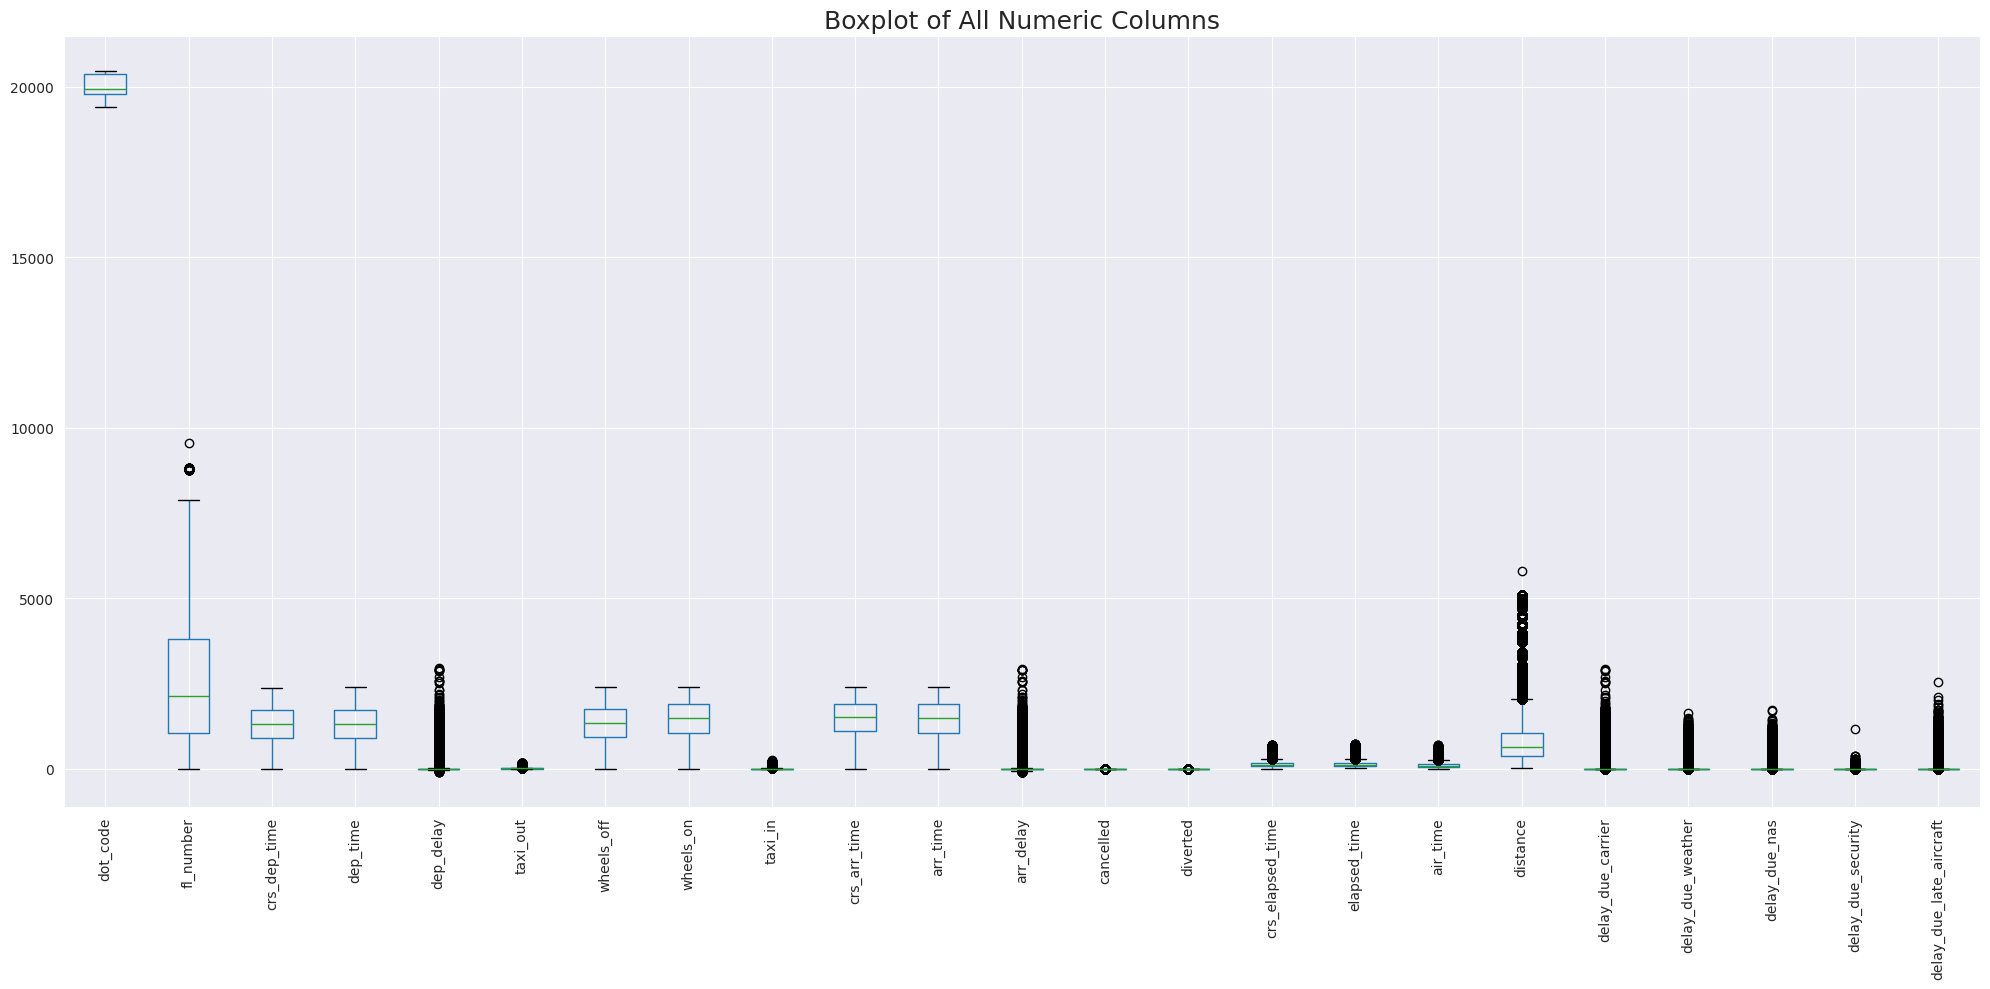

In [32]:
plt.figure(figsize=(20, 10))

flight_df.boxplot()

plt.title("Boxplot of All Numeric Columns", fontsize=18)
plt.xticks(rotation=90, fontsize=10)  
plt.grid(True)  
plt.tight_layout() 

plt.show()

In [33]:
def remove_outliers(df: pd.DataFrame):
    # Create a copy of the dataframe to avoid modifying the original
    df_no_outliers = df.copy()

    # Loop through each column to calculate IQR and detect outliers
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with NaN
        df_no_outliers[column] = df[column].apply(
            lambda x: np.nan if (pd.notna(x) and (x < lower_bound or x > upper_bound)) else x
        )

    return df_no_outliers

In [34]:
# Apply the function to remove outliers
flight_df = remove_outliers(flight_df)
flight_df

,fl_date,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562.0,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151,-4.0,19.0,1210,1443,4.0,1501,1447,-14.0,False,False,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149.0,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114,-6.0,9.0,2123,2232,NaN,2315,2310,-5.0,False,False,235.0,236.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459.0,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000,6.0,20.0,1020,1247,5.0,1252,1252,0.0,False,False,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295.0,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608,-1.0,27.0,1635,1844,9.0,1829,1853,24.0,False,False,260.0,285.0,249.0,1589.0,0.0,0.0,NaN,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407.0,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838,-2.0,15.0,1853,2026,14.0,2041,2040,-1.0,False,False,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522.0,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",1742,1740,-2.0,10.0,1750,1845,6.0,1907,1851,-16.0,False,False,85.0,71.0,55.0,328.0,0.0,0.0,0.0,0.0,0.0
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535.0,ORD,"Chicago, IL",AUS,"Austin, TX",1300,1254,-6.0,10.0,1304,1514,5.0,1556,1519,-37.0,False,False,176.0,145.0,130.0,977.0,0.0,0.0,0.0,0.0,0.0
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745.0,HSV,"Huntsville, AL",ATL,"Atlanta, GA",534,615,NaN,16.0,631,759,6.0,729,805,36.0,False,False,55.0,50.0,28.0,151.0,0.0,NaN,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134.0,BOS,"Boston, MA",LGA,"New York, NY",1600,1555,-5.0,19.0,1614,1704,8.0,1728,1712,-16.0,False,False,88.0,77.0,50.0,184.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# checking for missing values due to removal of outliers 
flight_df.isna().sum() 

fl_date                         0
airline                         0
airline_dot                     0
airline_code                    0
dot_code                        0
fl_number                     140
origin                          0
origin_city                     0
dest                            0
dest_city                       0
crs_dep_time                    0
dep_time                        0
dep_delay                  392850
taxi_out                   166368
wheels_off                      0
wheels_on                       0
taxi_in                    179309
crs_arr_time                    0
arr_time                        0
arr_delay                  285198
cancelled                       0
diverted                        0
crs_elapsed_time           154277
elapsed_time               152402
air_time                   155582
distance                   168407
delay_due_carrier          296951
delay_due_weather           31428
delay_due_nas              256477
delay_due_secu

In [36]:
missing_values_percentages(flight_df)

,Column,Missing (%)
dep_delay,dep_delay,13.095000
delay_due_carrier,delay_due_carrier,9.898367
arr_delay,arr_delay,9.506600
delay_due_late_aircraft,delay_due_late_aircraft,8.633800
delay_due_nas,delay_due_nas,8.549233
taxi_in,taxi_in,5.976967
distance,distance,5.613567
taxi_out,taxi_out,5.545600
air_time,air_time,5.186067
crs_elapsed_time,crs_elapsed_time,5.142567


In [37]:
# dropping the null values 
flight_df = flight_df.dropna(how='any')

In [38]:
flight_df.columns

Index(['fl_date', 'airline', 'airline_dot', 'airline_code', 'dot_code',
       'fl_number', 'origin', 'origin_city', 'dest', 'dest_city',
       'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'diverted', 'crs_elapsed_time', 'elapsed_time', 'air_time',
       'distance', 'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
       'delay_due_security', 'delay_due_late_aircraft'],
      dtype='object')

In [39]:
# Create a delay column: True if delayed, False otherwise

flight_df['target'] = (flight_df['arr_delay'] > 0) | (flight_df['dep_delay'] > 0)

/tmp/ipykernel_18851/3557608395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_df['target'] = (flight_df['arr_delay'] > 0) | (flight_df['dep_delay'] > 0)


In [40]:
flight_df.head()

,fl_date,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,target
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562.0,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151,-4.0,19.0,1210,1443,4.0,1501,1447,-14.0,False,False,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0,False
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459.0,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000,6.0,20.0,1020,1247,5.0,1252,1252,0.0,False,False,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0,True
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407.0,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838,-2.0,15.0,1853,2026,14.0,2041,2040,-1.0,False,False,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0,False
6,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134.0,DCA,"Washington, DC",BOS,"Boston, MA",1010,1001,-9.0,23.0,1024,1122,8.0,1159,1130,-29.0,False,False,109.0,89.0,58.0,399.0,0.0,0.0,0.0,0.0,0.0,False
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590.0,IAH,"Houston, TX",LAX,"Los Angeles, CA",530,527,-3.0,11.0,538,658,8.0,717,706,-11.0,False,False,227.0,219.0,200.0,1379.0,0.0,0.0,0.0,0.0,0.0,False


In [41]:
flight_df.isna().sum()

fl_date                    0
airline                    0
airline_dot                0
airline_code               0
dot_code                   0
fl_number                  0
origin                     0
origin_city                0
dest                       0
dest_city                  0
crs_dep_time               0
dep_time                   0
dep_delay                  0
taxi_out                   0
wheels_off                 0
wheels_on                  0
taxi_in                    0
crs_arr_time               0
arr_time                   0
arr_delay                  0
cancelled                  0
diverted                   0
crs_elapsed_time           0
elapsed_time               0
air_time                   0
distance                   0
delay_due_carrier          0
delay_due_weather          0
delay_due_nas              0
delay_due_security         0
delay_due_late_aircraft    0
target                     0
dtype: int64

In [42]:
flight_df.shape

(2109381, 32)

In [43]:
# Save the cleaned dataset (without outliers) to a CSV file

# flight_df.to_csv('cleaned_flight_data.csv', index=False)

### Data Preparation

#### 1. Dealing with categorical data

In [44]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2109381 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   fl_date                  datetime64[ns]
 1   airline                  category      
 2   airline_dot              category      
 3   airline_code             category      
 4   dot_code                 int64         
 5   fl_number                float64       
 6   origin                   category      
 7   origin_city              category      
 8   dest                     category      
 9   dest_city                category      
 10  crs_dep_time             int64         
 11  dep_time                 int64         
 12  dep_delay                float64       
 13  taxi_out                 float64       
 14  wheels_off               int64         
 15  wheels_on                int64         
 16  taxi_in                  float64       
 17  crs_arr_time             int64  

In [45]:
def preprocess_date_column(df: pd.DataFrame, date_column: str):
    
    df = df.copy()
    # Convert datetime to datetime object
    df[date_column] = pd.to_datetime(df[date_column])

    # Check if the date_column exists in the DataFrame columns
    if date_column not in df.columns:
        raise KeyError(f"Column '{date_column}' not found in the DataFrame columns")

    # Extract day, month, hour, and day of the week
    df['day'] = df[date_column].dt.day
    df['month'] = df[date_column].dt.month
    df['day_of_week'] = df[date_column].dt.dayofweek

    # Drop original datetime column
    df = df.drop(columns=[date_column])

    return df

In [46]:
preprocessed_date_flight_df = preprocess_date_column(flight_df, "fl_date")
preprocessed_date_flight_df.head(10)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,target,day,month,day_of_week
0,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562.0,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151,-4.0,19.0,1210,1443,4.0,1501,1447,-14.0,False,False,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0,False,9,1,2
2,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459.0,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000,6.0,20.0,1020,1247,5.0,1252,1252,0.0,False,False,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0,True,22,7,4
4,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407.0,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838,-2.0,15.0,1853,2026,14.0,2041,2040,-1.0,False,False,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0,False,23,2,6
6,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134.0,DCA,"Washington, DC",BOS,"Boston, MA",1010,1001,-9.0,23.0,1024,1122,8.0,1159,1130,-29.0,False,False,109.0,89.0,58.0,399.0,0.0,0.0,0.0,0.0,0.0,False,11,6,6
8,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590.0,IAH,"Houston, TX",LAX,"Los Angeles, CA",530,527,-3.0,11.0,538,658,8.0,717,706,-11.0,False,False,227.0,219.0,200.0,1379.0,0.0,0.0,0.0,0.0,0.0,False,12,2,6
9,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223.0,SEA,"Seattle, WA",FAI,"Fairbanks, AK",2125,2116,-9.0,19.0,2135,2353,3.0,2355,2356,1.0,False,False,210.0,220.0,198.0,1533.0,0.0,0.0,0.0,0.0,0.0,True,22,8,5
11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2107.0,RDU,"Raleigh/Durham, NC",DFW,"Dallas/Fort Worth, TX",1207,1201,-6.0,14.0,1215,1346,11.0,1358,1357,-1.0,False,False,171.0,176.0,151.0,1061.0,0.0,0.0,0.0,0.0,0.0,False,31,7,4
12,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,430.0,MDW,"Chicago, IL",BNA,"Nashville, TN",820,826,6.0,10.0,836,935,6.0,940,941,1.0,False,False,80.0,75.0,59.0,395.0,0.0,0.0,0.0,0.0,0.0,True,5,8,3
13,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1065.0,BDL,"Hartford, CT",ATL,"Atlanta, GA",600,555,-5.0,15.0,610,802,6.0,840,808,-32.0,False,False,160.0,133.0,112.0,859.0,0.0,0.0,0.0,0.0,0.0,False,20,11,2
14,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,687.0,SJC,"San Jose, CA",LAX,"Los Angeles, CA",2155,2155,0.0,11.0,2169,2309,6.0,2315,2315,-5.0,True,False,80.0,108.0,90.0,308.0,0.0,0.0,0.0,0.0,0.0,False,7,4,1


In [47]:
preprocessed_date_flight_df.shape

(2109381, 34)

In [48]:
preprocessed_date_flight_df.columns

Index(['airline', 'airline_dot', 'airline_code', 'dot_code', 'fl_number',
       'origin', 'origin_city', 'dest', 'dest_city', 'crs_dep_time',
       'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'diverted', 'crs_elapsed_time', 'elapsed_time', 'air_time', 'distance',
       'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
       'delay_due_security', 'delay_due_late_aircraft', 'target', 'day',
       'month', 'day_of_week'],
      dtype='object')

In [49]:
preprocessed_date_flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2109381 entries, 0 to 2999999
Data columns (total 34 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   airline                  category
 1   airline_dot              category
 2   airline_code             category
 3   dot_code                 int64   
 4   fl_number                float64 
 5   origin                   category
 6   origin_city              category
 7   dest                     category
 8   dest_city                category
 9   crs_dep_time             int64   
 10  dep_time                 int64   
 11  dep_delay                float64 
 12  taxi_out                 float64 
 13  wheels_off               int64   
 14  wheels_on                int64   
 15  taxi_in                  float64 
 16  crs_arr_time             int64   
 17  arr_time                 int64   
 18  arr_delay                float64 
 19  cancelled                bool    
 20  diverted                 bool

In [50]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df: pd.DataFrame, encoding_type: str = 'label') -> pd.DataFrame:
    """
    Encodes categorical columns in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame with categorical columns.
        encoding_type (str): The encoding type, either 'label' or 'onehot'.

    Returns:
        pd.DataFrame: A DataFrame with encoded categorical columns.
    """

    df_encoded = df.copy()

    categorical_columns = df_encoded.select_dtypes(include=['category']).columns

    if encoding_type == 'label':
        for col in categorical_columns:
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df_encoded[col])

    elif encoding_type == 'onehot':
        df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=True)
    else:
        raise ValueError("Unsupported encoding_type. Use 'label' or 'onehot' .")


    return df_encoded


In [51]:
#Encode using label encoding
flight_df_encoded = encode_categorical_columns(preprocessed_date_flight_df, encoding_type='label')
flight_df_encoded.head(10)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,target,day,month,day_of_week
0,17,17,14,19977,1562.0,131,118,123,240,1155,1151,-4.0,19.0,1210,1443,4.0,1501,1447,-14.0,False,False,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0,False,9,1,2
2,17,17,14,19977,459.0,99,89,247,220,954,1000,6.0,20.0,1020,1247,5.0,1252,1252,0.0,False,False,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0,True,22,7,4
4,16,16,10,20416,407.0,223,254,100,83,1840,1838,-2.0,15.0,1853,2026,14.0,2041,2040,-1.0,False,False,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0,False,23,2,6
6,2,2,1,19805,2134.0,96,353,49,41,1010,1001,-9.0,23.0,1024,1122,8.0,1159,1130,-29.0,False,False,109.0,89.0,58.0,399.0,0.0,0.0,0.0,0.0,0.0,False,11,6,6
8,16,16,10,20416,590.0,174,154,201,202,530,527,-3.0,11.0,538,658,8.0,717,706,-11.0,False,False,227.0,219.0,200.0,1379.0,0.0,0.0,0.0,0.0,0.0,False,12,2,6
9,0,0,2,19930,223.0,322,317,125,110,2125,2116,-9.0,19.0,2135,2353,3.0,2355,2356,1.0,False,False,210.0,220.0,198.0,1533.0,0.0,0.0,0.0,0.0,0.0,True,22,8,5
11,2,2,1,19805,2107.0,299,281,100,83,1207,1201,-6.0,14.0,1215,1346,11.0,1358,1357,-1.0,False,False,171.0,176.0,151.0,1061.0,0.0,0.0,0.0,0.0,0.0,False,31,7,4
12,15,15,15,19393,430.0,226,65,47,235,820,826,6.0,10.0,836,935,6.0,940,941,1.0,False,False,80.0,75.0,59.0,395.0,0.0,0.0,0.0,0.0,0.0,True,5,8,3
13,3,3,4,19790,1065.0,31,144,23,19,600,555,-5.0,15.0,610,802,6.0,840,808,-32.0,False,False,160.0,133.0,112.0,859.0,0.0,0.0,0.0,0.0,0.0,False,20,11,2
14,15,15,15,19393,687.0,331,303,201,202,2155,2155,0.0,11.0,2169,2309,6.0,2315,2315,-5.0,True,False,80.0,108.0,90.0,308.0,0.0,0.0,0.0,0.0,0.0,False,7,4,1


In [52]:
flight_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2109381 entries, 0 to 2999999
Data columns (total 34 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   airline                  int64  
 1   airline_dot              int64  
 2   airline_code             int64  
 3   dot_code                 int64  
 4   fl_number                float64
 5   origin                   int64  
 6   origin_city              int64  
 7   dest                     int64  
 8   dest_city                int64  
 9   crs_dep_time             int64  
 10  dep_time                 int64  
 11  dep_delay                float64
 12  taxi_out                 float64
 13  wheels_off               int64  
 14  wheels_on                int64  
 15  taxi_in                  float64
 16  crs_arr_time             int64  
 17  arr_time                 int64  
 18  arr_delay                float64
 19  cancelled                bool   
 20  diverted                 bool   
 21  crs_elapsed_t

#### 2. Scaling Data

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def scale_dataset(df: pd.DataFrame, scaling_type: str = 'standard') -> pd.DataFrame:
    """
    Scales numerical columns in the DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        scaling_type (str): The type of scaling to apply, either 'standard' or 'minmax'.

    Returns:
        pd.DataFrame: A DataFrame with scaled numerical columns.
    """
    df_scaled = df.copy()

    # select numeric columns
    numerical_columns = df_scaled.select_dtypes(include=['float64', 'int64']).columns

    if scaling_type == 'standard':
        scaler = StandardScaler()
    elif scaling_type == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("Unsupported scaling_type. Use 'standard' or 'minmax'. ")

    df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

    return df_scaled

In [54]:
# Apply standard scaling
scaled_flight_df = scale_dataset(flight_df_encoded, scaling_type='standard')
scaled_flight_df.head(10)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,target,day,month,day_of_week
0,1.277163,1.277163,0.846941,0.022579,-0.595488,-0.510433,-0.528911,-0.583030,0.620364,-0.289258,-0.281417,-0.273665,0.815002,-0.206236,-0.004162,-0.776095,0.074447,-0.007714,-0.338662,False,False,1.120668,1.120259,1.105150,0.876759,0.0,0.0,0.0,0.0,0.0,False,9,1,2
2,1.277163,1.277163,0.846941,0.022579,-1.228043,-0.821081,-0.803305,0.619439,0.431443,-0.707668,-0.593512,1.230235,1.005415,-0.599008,-0.399962,-0.455978,-0.425155,-0.399778,1.001810,False,False,-0.189579,-0.147387,-0.225020,-0.034928,0.0,0.0,0.0,0.0,0.0,True,22,7,4
4,1.104616,1.104616,0.141170,1.163856,-1.257864,0.382680,0.757902,-0.806069,-0.862663,1.136667,1.138511,0.027115,0.053348,1.122987,1.173139,2.425068,1.157923,1.184561,0.906062,False,False,1.024326,1.239101,1.105150,0.687318,0.0,0.0,0.0,0.0,0.0,False,23,2,6
6,-1.311046,-1.311046,-1.446814,-0.424572,-0.267454,-0.850204,1.694627,-1.300633,-1.259396,-0.591096,-0.591445,-1.025614,1.576656,-0.590739,-0.652385,0.504370,-0.611754,-0.645069,-1.774882,False,False,-0.362994,-0.602947,-0.809488,-0.700341,0.0,0.0,0.0,0.0,0.0,False,11,6,6
8,1.104616,1.104616,0.141170,1.163856,-1.152916,-0.092999,-0.188284,0.173361,0.261415,-1.590284,-1.571134,-0.123275,-0.708305,-1.595408,-1.589380,0.504370,-1.498599,-1.497555,-0.051418,False,False,1.910669,1.971959,2.052392,1.620317,0.0,0.0,0.0,0.0,0.0,False,12,2,6
9,-1.656140,-1.656140,-1.270371,-0.099607,-1.363386,1.343748,1.354000,-0.563636,-0.607620,1.729935,1.713096,-1.025614,0.815002,1.705943,1.833478,-1.096211,1.787944,1.819904,1.097558,False,False,1.583108,1.991766,2.012083,1.984992,0.0,0.0,0.0,0.0,0.0,True,22,8,5
11,-1.311046,-1.311046,-1.446814,-0.424572,-0.282938,1.120469,1.013373,-0.806069,-0.862663,-0.181012,-0.178075,-0.574444,-0.137065,-0.195900,-0.200043,1.464719,-0.212473,-0.188667,0.906062,False,False,0.831643,1.120259,1.064842,0.867287,0.0,0.0,0.0,0.0,0.0,False,31,7,4
12,0.932068,0.932068,1.023384,-1.495657,-1.244674,0.411804,-1.030390,-1.320027,0.573134,-0.986608,-0.953145,1.230235,-0.898719,-0.979376,-1.030010,-0.135862,-1.051164,-1.025069,1.097558,False,False,-0.921775,-0.880245,-0.789334,-0.709813,0.0,0.0,0.0,0.0,0.0,True,5,8,3
13,-1.138499,-1.138499,-0.917486,-0.463568,-0.880511,-1.481207,-0.282903,-1.552763,-1.467209,-1.444569,-1.513262,-0.424055,0.053348,-1.446568,-1.298588,-0.135862,-1.251807,-1.292476,-2.062126,False,False,0.619691,0.268559,0.278832,0.388947,0.0,0.0,0.0,0.0,0.0,False,20,11,2
14,0.932068,0.932068,1.023384,-1.495657,-1.097288,1.431117,1.221534,0.173361,0.261415,1.792384,1.793703,0.327895,-0.708305,1.776228,1.744625,-0.135862,1.707687,1.737470,0.523070,True,False,-0.921775,-0.226615,-0.164557,-0.915831,0.0,0.0,0.0,0.0,0.0,False,7,4,1


#### 3. Dealing with Class Imbalance

In [55]:
scaled_flight_df.target.value_counts()

target
False    1551701
True      557680
Name: count, dtype: int64

In [56]:
from imblearn.over_sampling import SMOTE

def balance_with_smote(df: pd.DataFrame, target_column: str):
    """
    Apply SMOTE to balance the dataset.

    Parameters:
        df (pd.DataFrame): Input DataFrame (encoded and scaled).
        target_column (str): Name of the target column.

    Returns:
        X_resampled (pd.DataFrame): Resampled feature set.
        y_resampled (pd.Series): Resampled target column.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]

    smote = SMOTE(random_state=142)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Convert back to DataFrame
    X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    y_resampled = pd.Series(y_resampled, name=target_column)

    return X_resampled, y_resampled

In [57]:
scaled_flight_df.columns

Index(['airline', 'airline_dot', 'airline_code', 'dot_code', 'fl_number',
       'origin', 'origin_city', 'dest', 'dest_city', 'crs_dep_time',
       'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'diverted', 'crs_elapsed_time', 'elapsed_time', 'air_time', 'distance',
       'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
       'delay_due_security', 'delay_due_late_aircraft', 'target', 'day',
       'month', 'day_of_week'],
      dtype='object')

In [58]:
# Balancing the target class 
X_balanced, y_balanced = balance_with_smote(scaled_flight_df, "target")

In [59]:
# Check class distribution
print("Class distribution after SMOTE:")
print(y_balanced.value_counts())

Class distribution after SMOTE:
target
False    1551701
True     1551701
Name: count, dtype: int64


In [60]:
# Combine back into a single DataFrame if needed
balanced_flight_df = pd.concat([X_balanced, y_balanced], axis=1)
balanced_flight_df.head(15)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,day,month,day_of_week,target
0,1.277163,1.277163,0.846941,0.022579,-0.595488,-0.510433,-0.528911,-0.583030,0.620364,-0.289258,-0.281417,-0.273665,0.815002,-0.206236,-0.004162,-0.776095,0.074447,-0.007714,-0.338662,False,False,1.120668,1.120259,1.105150,0.876759,0.0,0.0,0.0,0.0,0.0,9,1,2,False
1,1.277163,1.277163,0.846941,0.022579,-1.228043,-0.821081,-0.803305,0.619439,0.431443,-0.707668,-0.593512,1.230235,1.005415,-0.599008,-0.399962,-0.455978,-0.425155,-0.399778,1.001810,False,False,-0.189579,-0.147387,-0.225020,-0.034928,0.0,0.0,0.0,0.0,0.0,22,7,4,True
2,1.104616,1.104616,0.141170,1.163856,-1.257864,0.382680,0.757902,-0.806069,-0.862663,1.136667,1.138511,0.027115,0.053348,1.122987,1.173139,2.425068,1.157923,1.184561,0.906062,False,False,1.024326,1.239101,1.105150,0.687318,0.0,0.0,0.0,0.0,0.0,23,2,6,False
3,-1.311046,-1.311046,-1.446814,-0.424572,-0.267454,-0.850204,1.694627,-1.300633,-1.259396,-0.591096,-0.591445,-1.025614,1.576656,-0.590739,-0.652385,0.504370,-0.611754,-0.645069,-1.774882,False,False,-0.362994,-0.602947,-0.809488,-0.700341,0.0,0.0,0.0,0.0,0.0,11,6,6,False
4,1.104616,1.104616,0.141170,1.163856,-1.152916,-0.092999,-0.188284,0.173361,0.261415,-1.590284,-1.571134,-0.123275,-0.708305,-1.595408,-1.589380,0.504370,-1.498599,-1.497555,-0.051418,False,False,1.910669,1.971959,2.052392,1.620317,0.0,0.0,0.0,0.0,0.0,12,2,6,False
5,-1.656140,-1.656140,-1.270371,-0.099607,-1.363386,1.343748,1.354000,-0.563636,-0.607620,1.729935,1.713096,-1.025614,0.815002,1.705943,1.833478,-1.096211,1.787944,1.819904,1.097558,False,False,1.583108,1.991766,2.012083,1.984992,0.0,0.0,0.0,0.0,0.0,22,8,5,True
6,-1.311046,-1.311046,-1.446814,-0.424572,-0.282938,1.120469,1.013373,-0.806069,-0.862663,-0.181012,-0.178075,-0.574444,-0.137065,-0.195900,-0.200043,1.464719,-0.212473,-0.188667,0.906062,False,False,0.831643,1.120259,1.064842,0.867287,0.0,0.0,0.0,0.0,0.0,31,7,4,False
7,0.932068,0.932068,1.023384,-1.495657,-1.244674,0.411804,-1.030390,-1.320027,0.573134,-0.986608,-0.953145,1.230235,-0.898719,-0.979376,-1.030010,-0.135862,-1.051164,-1.025069,1.097558,False,False,-0.921775,-0.880245,-0.789334,-0.709813,0.0,0.0,0.0,0.0,0.0,5,8,3,True
8,-1.138499,-1.138499,-0.917486,-0.463568,-0.880511,-1.481207,-0.282903,-1.552763,-1.467209,-1.444569,-1.513262,-0.424055,0.053348,-1.446568,-1.298588,-0.135862,-1.251807,-1.292476,-2.062126,False,False,0.619691,0.268559,0.278832,0.388947,0.0,0.0,0.0,0.0,0.0,20,11,2,False
9,0.932068,0.932068,1.023384,-1.495657,-1.097288,1.431117,1.221534,0.173361,0.261415,1.792384,1.793703,0.327895,-0.708305,1.776228,1.744625,-0.135862,1.707687,1.737470,0.523070,True,False,-0.921775,-0.226615,-0.164557,-0.915831,0.0,0.0,0.0,0.0,0.0,7,4,1,False


In [61]:
missing_values_percentages(balanced_flight_df)

,Column,Missing (%)


In [62]:
balanced_flight_df.target.value_counts()

target
False    1551701
True     1551701
Name: count, dtype: int64

In [63]:
# saving preprocessed dataset as preprocessing is error prone and takes time 

#balanced_flight_df.to_csv('preprocessed_flight_data_for_binary_classification.csv', index=False)

#### 4. Splitting the Dataset into train and test

In [64]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=142)

### Model Building and Evaluation

#### 1. Baseline Logistic regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [83]:
# logistic regression
log_reg = LogisticRegression(random_state=142)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
# Model Evaluation for Logistic Regression
print("Logistic Regression:")

print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg)}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg)}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])}")


Logistic Regression:
Accuracy: 0.9248583410802006
Precision: 0.9238055430518938
Recall: 0.9260595043559818
F1 Score: 0.9249311505384824
ROC-AUC Score: 0.9817155959377655


In [90]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Plot ROC Curve for Logistic Regression
# plot_roc_curve(log_reg, X_test, y_test)
# plt.title("ROC Curve - Logistic Regression")
# plt.show()

Confusion Matrix:
[[286720  23698]
 [ 22941 287322]]


#### 2. Random Forest 

In [85]:
# random forest 
rf = RandomForestClassifier(random_state=142)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [86]:
# Model Evaluation for Random Forest
print("\nRandom Forest:")

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])}")


Random Forest:
Accuracy: 0.9991815441426434
Precision: 1.0
Recall: 0.9983626794042474
F1 Score: 0.9991806689483209
ROC-AUC Score: 0.9999999228023484


#### 3. Support Vector Machine (SVM)

In [91]:
# support vector machine

svm = SVC(random_state=142, probability=True)
svm.fit(X_train, y_train)

y_train_svm = svm.predict(X_test)

In [ ]:
# Model Evaluation for SVM
print("\nSupport Vector Machine (SVM):")

print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Precision: {precision_score(y_test, y_pred_svm)}")
print(f"Recall: {recall_score(y_test, y_pred_svm)}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])}")

#### 4. Gradient Boosting Machine (eg we'll use XGBoost)

In [ ]:
# xg boost 
xgb = XGBClassifier(random_state=142)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Model Evaluation for XGBoost
print("\nGradient Boosting Machine (XGBoost):")

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb)}")
print(f"Recall: {recall_score(y_test, y_pred_xgb)}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])}")

### Final Model test using the test Data

In [ ]:
# final model test 


### Conclusion